## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [2827]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2828]:
#importing libraries
import numpy as np
import pandas as pd

In [2829]:
#loading the data
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2830]:
bike_df.shape

(730, 16)

In [2831]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


we can see that there is no mising values for the variables hence no need for missing value treatment

## Step 2: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [2832]:
#importing the library
import matplotlib.pyplot as plt
import seaborn as sns

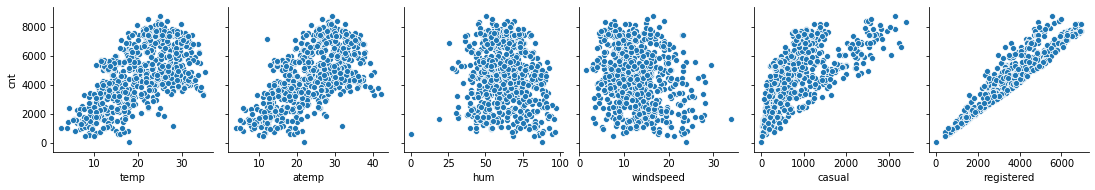

In [2833]:
#ploting pair plot between the target variable and numerical variables 
sns.pairplot(data = bike_df, x_vars = ['temp', 'atemp', 'hum' , 'windspeed' , 'casual' , 'registered'], y_vars = 'cnt')
plt.show()

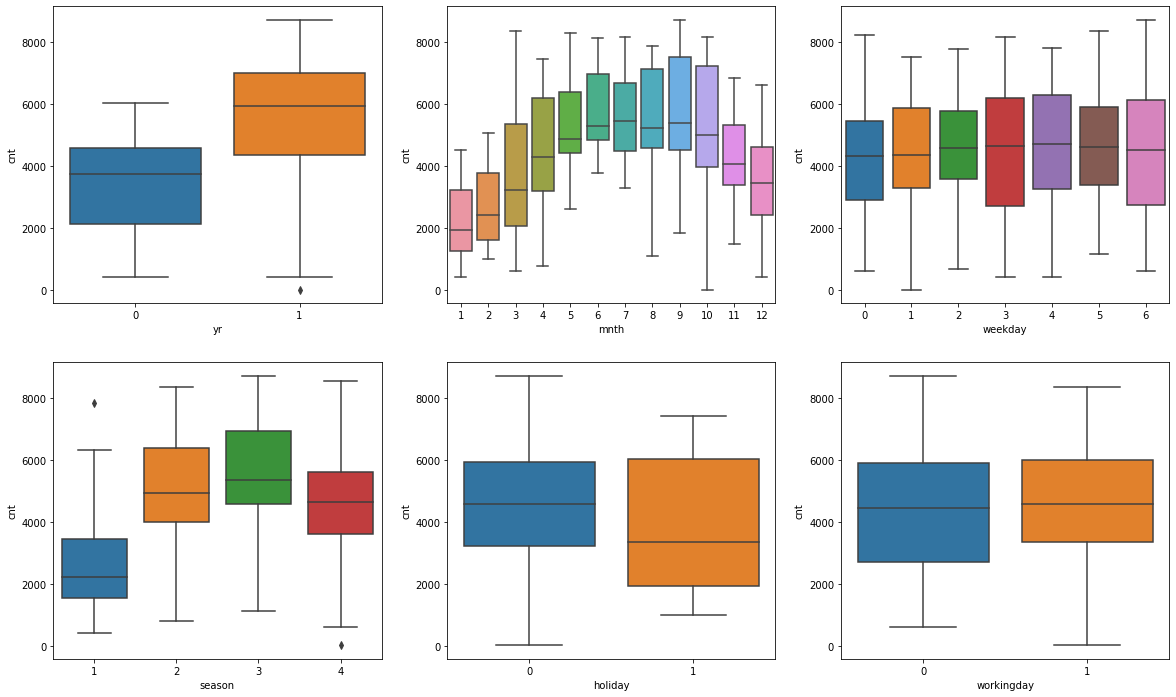

In [2834]:
#plotting box plot to visualize the relation between the categorical variables and target variable 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()

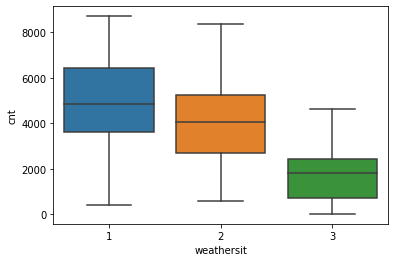

In [2835]:
#ploting box plot between categorical variable weathersit and target variable
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)

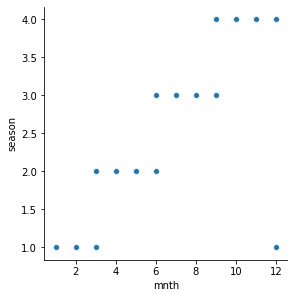

In [2836]:
# Visualising month and seasons Variables
sns.pairplot(bike_df, x_vars=['mnth'], y_vars='season',size=4, aspect=1, kind='scatter')
plt.show()


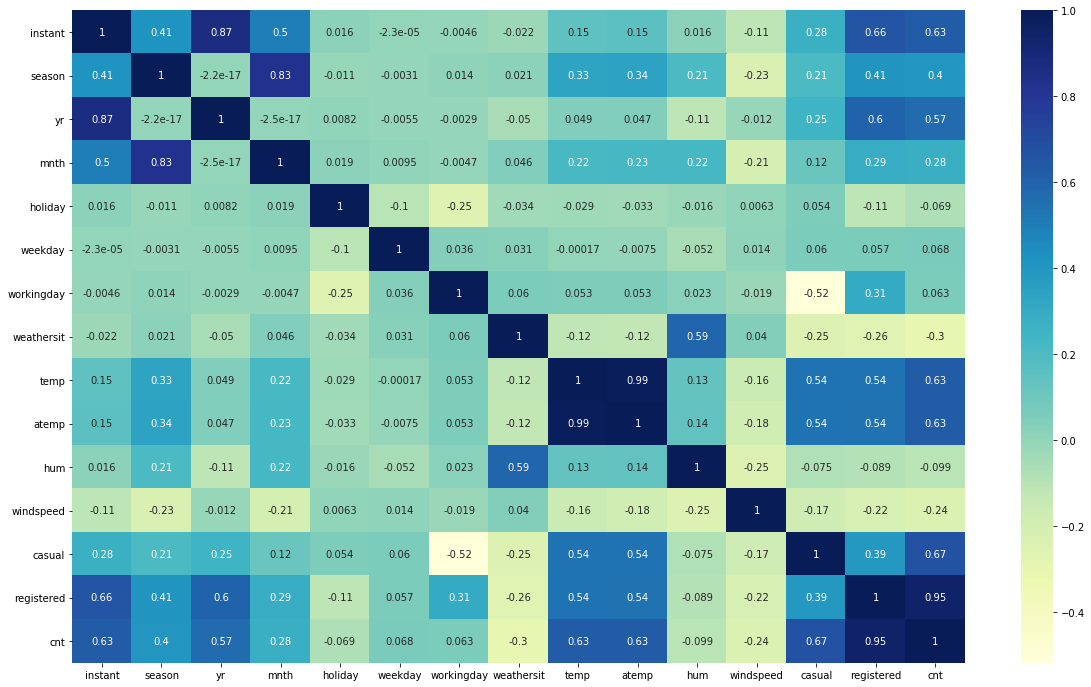

In [2837]:
#plotting a heat map with the corresponding correlatons 
plt.figure(figsize=(20, 12))
sns.heatmap(bike_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Step 3: Data Preparation

from the data dictionary we can see the defination of `weathersit`
 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 while maping , i will map it as 
 - 1: Cloudy
 - 2: Mist
 - 3: Light_snow
 - 4: Heavy_rain

In [2838]:
#maping the weathersit to corresponding category so that creating dummy variables will be easy
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Cloudy',2:'Mist',3:'Light_snow',4:'Heavy_rain'})
bike_df['weathersit'].value_counts()

Cloudy        463
Mist          246
Light_snow     21
Name: weathersit, dtype: int64

In [2839]:
#maping the season to corresponding category so that creating dummy variables will be easy
bike_df['season'] = bike_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [2840]:
#maping the weekday to corresponding category so that creating dummy variables will be easy
bike_df['weekday'] = bike_df['weekday'].map({1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday' , 5:'Sunday', 6: 'Monday' , 0: 'Tuesday' })

In [2841]:
bike_df['mnth'] = bike_df['mnth'].map({1:'JAN',2:'FEB',3:'MAR',4:'APRIL' , 5:'MAY', 6: 'JUNE' , 7: 'JULY', 8:'AUG', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DEC' })

### Dummy Variables

The variable `weathersit` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [2842]:
# Get the dummy variables for the feature 'weathersit' and store it in a new dataframe - 'status'
status = pd.get_dummies(bike_df['weathersit'])
status.head()

,Cloudy,Light_snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


Now, we don't need three columns. we can drop the `Cloudy` column, as the type of weather can be identified with just the last two columns where — 
- `00` will correspond to `Cloudy`
- `01` will correspond to `Mist`
- `10` will correspond to `Light_snow`

In [2843]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bike_df['weathersit'], drop_first = True)

In [2844]:
# Add the results to the original housing dataframe

bike_df = pd.concat([bike_df, status], axis = 1)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light_snow,Mist
0,1,01-01-2018,spring,0,JAN,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,2,02-01-2018,spring,0,JAN,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,3,03-01-2018,spring,0,JAN,0,Wednesday,1,Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,spring,0,JAN,0,Thursday,1,Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,spring,0,JAN,0,Friday,1,Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [2845]:
# Drop 'weathersit' as we have created the dummies for it

bike_df.drop(['weathersit'], axis = 1, inplace = True)

The variable `season` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [2846]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'
status = pd.get_dummies(bike_df['season'])

Now, we don't need four columns. we can drop the `fall` column, as the type of weather can be identified with just the last two columns where — 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [2847]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bike_df['season'], drop_first = True)

In [2848]:
# Add the results to the original housing dataframe

bike_df = pd.concat([bike_df, status], axis = 1)

In [2849]:
# Drop 'season' as we have created the dummies for it

bike_df.drop(['season'], axis = 1, inplace = True)

In [2850]:
bike_df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light_snow,Mist,spring,summer,winter
0,1,01-01-2018,0,JAN,0,Monday,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,2,02-01-2018,0,JAN,0,Tuesday,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,3,03-01-2018,0,JAN,0,Wednesday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,4,04-01-2018,0,JAN,0,Thursday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,5,05-01-2018,0,JAN,0,Friday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [2851]:
# Get the dummy variables for the feature 'weekday' and store it in a new dataframe - 'status'
status = pd.get_dummies(bike_df['weekday'])
status = pd.get_dummies(bike_df['weekday'], drop_first = True)
#concarting the data frames
bike_df = pd.concat([bike_df, status], axis = 1)
bike_df.drop(['weekday'], axis = 1, inplace = True)
bike_df.head()

,instant,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,JAN,0,0,14.110847,18.18125,80.5833,10.749882,...,1,1,0,0,1,0,0,0,0,0
1,2,02-01-2018,0,JAN,0,0,14.902598,17.68695,69.6087,16.652113,...,1,1,0,0,0,0,0,0,1,0
2,3,03-01-2018,0,JAN,0,1,8.050924,9.47025,43.7273,16.636703,...,0,1,0,0,0,0,0,0,0,1
3,4,04-01-2018,0,JAN,0,1,8.200000,10.60610,59.0435,10.739832,...,0,1,0,0,0,0,0,1,0,0
4,5,05-01-2018,0,JAN,0,1,9.305237,11.46350,43.6957,12.522300,...,0,1,0,0,0,0,0,0,0,0


In [2852]:
# Get the dummy variables for the feature 'mnth' and store it in a new dataframe - 'status'
status = pd.get_dummies(bike_df['mnth'])
status = pd.get_dummies(bike_df['mnth'], drop_first = True)
#concarting the data frames

bike_df = pd.concat([bike_df, status], axis = 1)
bike_df.drop(['mnth'], axis = 1, inplace = True)
bike_df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,DEC,FEB,JAN,JULY,JUNE,MAR,MAY,NOV,OCT,SEP
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


In [2853]:
#droping instant and dteday variables as they are not revellant to the analysis
bike_df.drop(['instant'], axis = 1, inplace = True)

bike_df.drop(['dteday'], axis = 1, inplace = True)

In [2854]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,DEC,FEB,JAN,JULY,JUNE,MAR,MAY,NOV,OCT,SEP
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,0,0,0,0


`temp` and `atemp` have a correlation of 0.99 , i am choosing to drop one of the columns 
from the defination of the columns in the data dictionary , i am choosing to drop column `atemp` as it is a feeling temperature not the actual one 

In [2855]:
#droping the feature atemp
bike_df.drop(['atemp'], axis = 1, inplace = True)

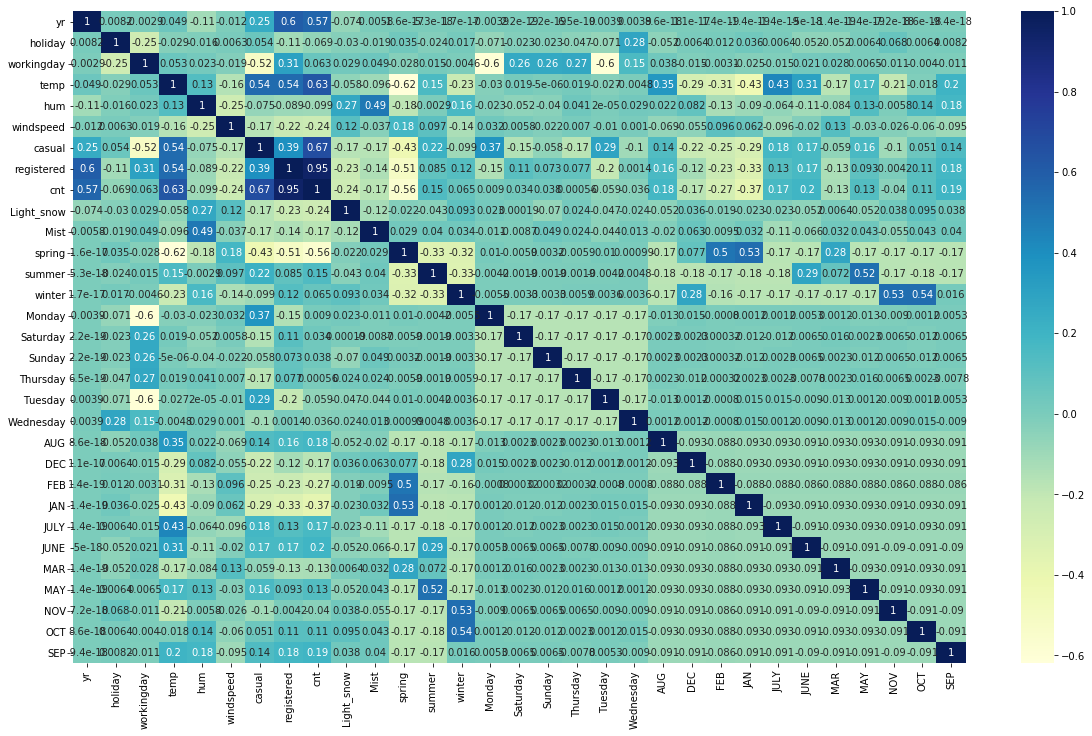

In [2856]:
#ploting a heat map with respective correlations
plt.figure(figsize=(20, 12))
sns.heatmap(bike_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets and building the model



In [2857]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2858]:
#performing min-max scalling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2859]:
# Apply scaler() to all the columns except the '1&0 i.e binary columns' and 'dummy' variables
num_vars = ['temp',  'hum', 'cnt' , 'windspeed' , 'casual' , 'registered']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,Light_snow,...,DEC,FEB,JAN,JULY,JUNE,MAR,MAY,NOV,OCT,SEP
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,0,0,0,0,0,0


In [2860]:
#checking the max value of the scalled variables is 1 as we are using min max scaling
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,Light_snow,...,DEC,FEB,JAN,JULY,JUNE,MAR,MAY,NOV,OCT,SEP
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.029412,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.169124,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2861]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [2862]:
#Build first linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()


In [2863]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.874e+30
Date:                Wed, 07 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:09:05   Log-Likelihood:                 17207.
No. Observations:                 510   AIC:                        -3.435e+04
Df Residuals:                     480   BIC:                        -3.423e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.943e-16   2.33e-16     -0.833      0.4

In [2864]:
# Calculate the VIFs  for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,102.89
13,Monday,22.26
17,Tuesday,20.06
10,spring,10.87
12,winter,9.99
3,temp,8.61
11,summer,8.39
7,registered,7.76
27,NOV,6.82
28,OCT,6.62


### INSIGHTS OF THE MODEL 

Apart from the  p values and the VIF value if you have a look at the coefficients there is a intresting pattern. for the features `registered` and `casual` the coefficients are considerable but for others they are very insignificant. this is a clasic example of output leckage as we know from the data dictionary that the target variable `cnt` is sum of `registered` and `casual`.Prob (F-statistic):0.00  and the Adjusted R2 is 1. Hence if these two columns are present in the dataset then the remaining features will be insignificant (justified by high value of the coefficients. so i choose to drop these columns.

In [2865]:
#Droping casual and registered columns
df_train.drop(['casual'], axis = 1, inplace = True)
df_train.drop(['registered'], axis = 1, inplace = True)
X_train = df_train

In [2866]:
#Build second linear model
X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
#printing the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          8.74e-182
Time:                        22:09:05   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2429      0.035      6.854      0.0

In [2867]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.81
11,Monday,19.72
15,Tuesday,18.35
8,spring,10.79
10,winter,9.50
9,summer,8.29
3,temp,7.12
25,NOV,6.80
26,OCT,6.59
17,AUG,6.43


As we see now that the models have a very good coefficients for the features. now we will concentrate on the features that have high P values, we will try to remove these columns and have a look at the VIF after removing these.

In [2868]:
#removing holiday feature
df_train.drop(['holiday'], axis = 1, inplace = True)
X_train = df_train

In [2869]:
#Build third linear model
X_train_lm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
#printing the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          8.74e-182
Time:                        22:09:05   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2497      0.053      4.754      0.0

In [2870]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,39.49
2,temp,38.70
1,workingday,22.23
7,spring,12.36
9,winter,12.16
8,summer,7.91
25,OCT,6.52
10,Monday,6.48
16,AUG,6.30
24,NOV,6.15


now we will concentrate on the features that have high P values, we will try to remove these columns and have a look at the VIF after removing these.

In [2871]:
#removing weekday related feature(dummy variables) with very high p-value
df_train.drop(['Saturday'], axis = 1, inplace = True)
df_train.drop(['Sunday'], axis = 1, inplace = True)
df_train.drop(['Thursday'], axis = 1, inplace = True)
df_train.drop(['Tuesday'], axis = 1, inplace = True)
df_train.drop(['Wednesday'], axis = 1, inplace = True)
X_train = df_train

In [2872]:
#Build fourth linear model
X_train_lm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
#printing the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.15e-185
Time:                        22:09:05   Log-Likelihood:                 524.75
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     487   BIC:                            -906.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2831      0.044      6.399      0.0

In [2873]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,37.17
2,temp,37.11
7,spring,11.74
9,winter,11.71
8,summer,6.86
20,OCT,6.36
19,NOV,5.96
11,AUG,5.89
15,JULY,5.23
14,JAN,5.22


now we will concentrate on the features that have high P values, we will try to remove these columns and have a look at the VIF after removing these.

In [2874]:
#removing month related feature(dummy variables) with very high p-value
df_train.drop(['AUG'], axis = 1, inplace = True)
df_train.drop(['DEC'], axis = 1, inplace = True)
df_train.drop(['FEB'], axis = 1, inplace = True)
df_train.drop(['JULY'], axis = 1, inplace = True)
df_train.drop(['JUNE'], axis = 1, inplace = True)
df_train.drop(['MAR'], axis = 1, inplace = True)
df_train.drop(['MAY'], axis = 1, inplace = True)
df_train.drop(['NOV'], axis = 1, inplace = True)
df_train.drop(['OCT'], axis = 1, inplace = True)
df_train.drop(['JAN'], axis = 1, inplace = True)
#df_train.drop(['SEP'], axis = 1, inplace = True)
X_train = df_train

In [2875]:
#Build fifth linear model
X_train_lm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
#printing the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.23e-191
Time:                        22:09:06   Log-Likelihood:                 510.90
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     497   BIC:                            -940.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2167      0.036      6.083      0.0

In [2876]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.41
2,temp,15.66
1,workingday,4.71
4,windspeed,4.69
7,spring,4.09
9,winter,3.24
8,summer,2.50
6,Mist,2.28
0,yr,2.08
10,Monday,1.84


In [2877]:
#Removing feature hum as it is having high value of VIF 28.41
df_train.drop(['hum'], axis = 1, inplace = True)
X_train = df_train

In [2878]:
#Build sixth linear model
X_train_lm = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
#printing the summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          6.86e-189
Time:                        22:09:06   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1405      0.031      4.599      0.0

In [2879]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
6,spring,2.30
0,yr,2.07
7,summer,1.99
9,Monday,1.83
8,winter,1.77
5,Mist,1.56
10,SEP,1.23


# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [2880]:
# Making predictions using the sixth model - final model

y_pred_m6 = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

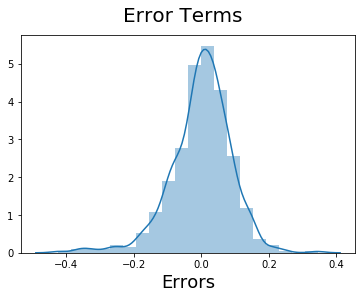

In [2881]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_m6), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
# X-label
plt.xlabel('Errors', fontsize = 18)                         

# Step 5 Making Predictions Using the Final Model

In [2882]:
# Applying the scaling transform on the test sets
num_vars = ['temp',  'hum', 'cnt' , 'windspeed' , 'casual' , 'registered']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [2883]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
#droping the features that are not considered for training
df_test.drop(['holiday'], axis = 1, inplace = True)
df_test.drop(['Saturday'], axis = 1, inplace = True)
df_test.drop(['Sunday'], axis = 1, inplace = True)
df_test.drop(['Thursday'], axis = 1, inplace = True)
df_test.drop(['Tuesday'], axis = 1, inplace = True)
df_test.drop(['Wednesday'], axis = 1, inplace = True)
df_test.drop(['AUG'], axis = 1, inplace = True)
df_test.drop(['DEC'], axis = 1, inplace = True)
df_test.drop(['FEB'], axis = 1, inplace = True)
df_test.drop(['JULY'], axis = 1, inplace = True)
df_test.drop(['JUNE'], axis = 1, inplace = True)
df_test.drop(['MAR'], axis = 1, inplace = True)
df_test.drop(['MAY'], axis = 1, inplace = True)
df_test.drop(['NOV'], axis = 1, inplace = True)
df_test.drop(['OCT'], axis = 1, inplace = True)
df_test.drop(['JAN'], axis = 1, inplace = True)
df_test.drop(['hum'], axis = 1, inplace = True)
df_test.drop(['casual'], axis = 1, inplace = True)
df_test.drop(['registered'], axis = 1, inplace = True)
X_test = df_test

In [2884]:
#let use final model to make predictions.
# Adding a constant variable 
X_test_new = sm.add_constant(X_test)
# Making predictions
y_pred = lr_6.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

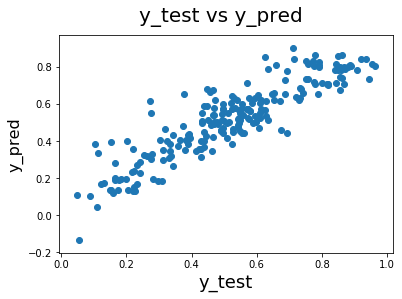

In [2885]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize=20)   
# X-label
plt.xlabel('y_test', fontsize=18)
# Y-label
plt.ylabel('y_pred', fontsize=16)                          

In [2886]:
#calculating the r2 score on the test set
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred)
r2

0.8058786233591086

we can see that the over all model Adjusted r2 score is 0.835 on the train set. now the r2 score on the test set is 0.80 . we can say that the model is not over fitting 